<a href="https://colab.research.google.com/github/sapdas/flattenthecurve/blob/main/flattenTheCurve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Agent Based Modeling and simulation - understand how flatten-the-curve works

Assumptions:


*   The entire population is within 1 unit x 1 unit area
*   No influx - reasonable assumption as all countries are locked down
*   Everyone will recover (with immunity) - yes, I'm hopeful
*   People are not running out of quarantine for 14 days


## All variables are set in this block

*   NP - size of the population
*   NT - Total number of time steps
*   NI - number of initially effected individuals
*   rCon  - radius of contamination
*   sDist - an inverse measure of social distance, controls the variability of random walk  change and see the effect



In [ ]:
NP = 10000 
NT = 25 
NI = 20 
rCon  = .01
sDist = .1 # change this number to see the effect

## All key library imports

In [ ]:
import numpy as np
import math as ma 
import matplotlib.pyplot as plt

## Simulate the initial state of the population

In [ ]:
# generate random locations
x_loc = np.random.uniform(low=0.0, high=1.0, size=NP)
y_loc = np.random.uniform(low=0.0, high=1.0, size=NP)
# without loss of generality, lets thassume that first NP are infected
# those will be idetified and quarantine for 14 days
inf = np.zeros(NP)
inf[0:NI] = -15*np.ones(NI)
infCount = np.zeros(NT)

## Time stepping starts here

In [ ]:
for t in range(NT):
 
  infCount[t] = (inf == -15).sum()
  
  # find new infected by looping through healthy population 
  for p in np.where(inf == 0)[0]: 
    # check distance to at least one infected but not in quarantine
    for ip in np.where(inf == -15)[0]:
      dist = ma.hypot(x_loc[p] - x_loc[ip], y_loc[p] - y_loc[ip])
      if dist <= rCon:  
        # mark as infected and break
        inf[p] = -16
        break
 
  # quarantine for 14 days 
  for p in np.where(inf <= -1)[0]:
    inf[p] = inf[p] + 1 
 
  # move people around thier location with social distancing factor sDist 
  x_loc = np.mod(x_loc + np.random.normal(loc=0.0, scale=sDist, size=NP), 
                 np.ones(NP)) 
  y_loc = np.mod(y_loc + np.random.normal(loc=0.0, scale=sDist, size=NP), 
                 np.ones(NP))

## Print results, plot number of infected over time

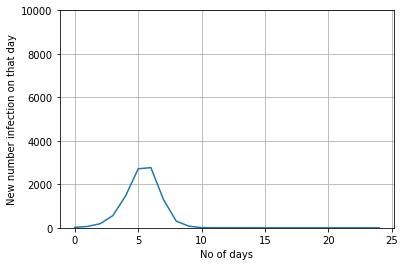

In [ ]:
plt.plot(infCount)
plt.xlabel("No of days")
plt.ylabel("New number infection on that day")
plt.ylim((0, NP))
plt.grid(True)
plt.show()